# Project 7 - Advanced Data Analysis

In [1]:
import pandas as pd  
import numpy as np  
import datetime  
import matplotlib.pyplot as plt
  
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    # Column with name of indicator variable  
    data[indicator_name] = 0   
    # Value of 1 recorded for each index that matches an entry in target_index_list
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# Imported data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True) 
 
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  

keys = data.keys()
for key in keys:  
    if "GDP" in key:  
        data[key + " Lag"] = data[key].groupby("ISO_Code").shift()
        data["Log " + key] = np.log(data[key])  
        data["Log " + key + " Lag"] = data["Log " + key].groupby("ISO_Code").shift()
        
        
# Initialize the diff data as the dataframe - only include index values  
diff_index = data.groupby(level=0).diff().dropna().index  
data_dict = {}  
data_dict["Data"] = data  

data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby("ISO_Code").diff() 
data_dict["Diff Data"].dropna(inplace = True)

# Create indicator variable for North Amierca in both data and diff_data  
indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)

In [2]:
data_dict[key]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -244.0               -338.0   
         2013-01-01           -565.0               -244.0   
         2012-01-01            206.0               -565.0   
         2011-01-01           -860.0                206.0   
         2010-01-01           -160.0               -860.0   
...                              ...                  ...   
ZWE      2005-01-01             73.0                 65.0   
         2004-01-01            153.0                 73.0   
         2003-01-01            145.0                153.0   
         2002-01-01            418.0                145.0   
         2001-01-01            248.0                418.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022541                -0.030409   
         2013-01-01            -0.054233                -0.022541   
         2012-01-01             0.020116                -0.054233   
         2011-01-01            -0.086800                 0.020116   
         2010-01-01            -0.017014                -0.086800   
...                                  ...                      ...   
ZWE      2005-01-01             0.044972                 0.041820   
         2004-01-01             0.088165                 0.044972   
         2003-01-01             0.076941                 0.088165   


In [3]:
data_dict[key].dropna()

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -244.0               -338.0   
         2013-01-01           -565.0               -244.0   
         2012-01-01            206.0               -565.0   
         2011-01-01           -860.0                206.0   
         2010-01-01           -160.0               -860.0   
...                              ...                  ...   
ZWE      2005-01-01             73.0                 65.0   
         2004-01-01            153.0                 73.0   
         2003-01-01            145.0                153.0   
         2002-01-01            418.0                145.0   
         2001-01-01            248.0                418.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022541                -0.030409   
         2013-01-01            -0.054233                -0.022541   
         2012-01-01             0.020116                -0.054233   
         2011-01-01            -0.086800                 0.020116   
         2010-01-01            -0.017014                -0.086800   
...                                  ...                      ...   
ZWE      2005-01-01             0.044972                 0.041820   
         2004-01-01             0.088165                 0.044972   
         2003-01-01             0.076941                 0.088165   


In [4]:
import statsmodels.api as sm

# Preparing regression variables  
X_names = ["EFW", "Log RGDP Per Capita Lag"]  
y_name = ["Log RGDP Per Capita"]  

# Saving instance of regression class  
for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    
    # Calls OLS method 
    Y = reg_data[y_name]  
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 3.548e+05
Date:                 Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                         22:24:09   Log-Likelihood:                 2631.6
No. Observations:                 2031   AIC:                            -5257.
Df Residuals:                     2028   BIC:                            -5240.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-4-538e2448efa3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-4-538e2448efa3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [5]:
X_names = ["EFW", "Log RGDP Per Capita Lag", "North America"]

for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    
    # Calls OLS method 
    Y = reg_data[y_name]  
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 2.366e+05
Date:                 Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                         22:24:10   Log-Likelihood:                 2632.3
No. Observations:                 2031   AIC:                            -5257.
Df Residuals:                     2027   BIC:                            -5234.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-5-128e723ea52c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-5-128e723ea52c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [6]:
!pip install linearmodels

Data
Entity = True
Time = True


<ipython-input-7-99750744eede>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.2259
Estimator:                    PanelOLS   R-squared (Between):              0.5383
No. Observations:                 2031   R-squared (Within):               0.3842
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.5362
Time:                         22:24:17   Log-likelihood                    1498.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      90.543
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(6,1862)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust):             11.243
           

<ipython-input-7-99750744eede>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-7-99750744eede>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


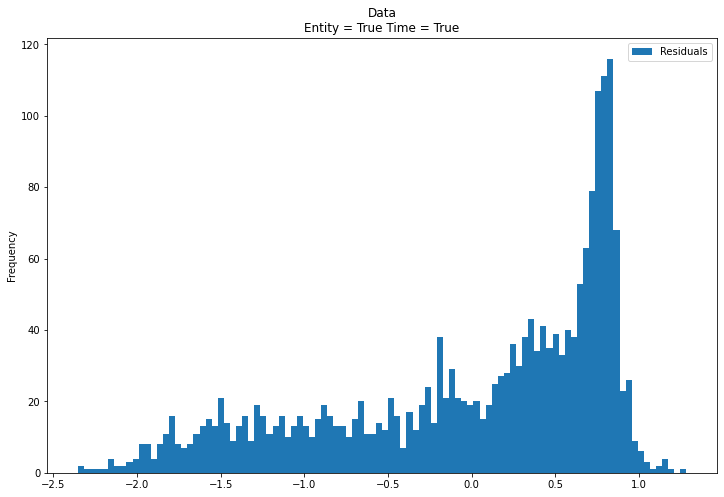

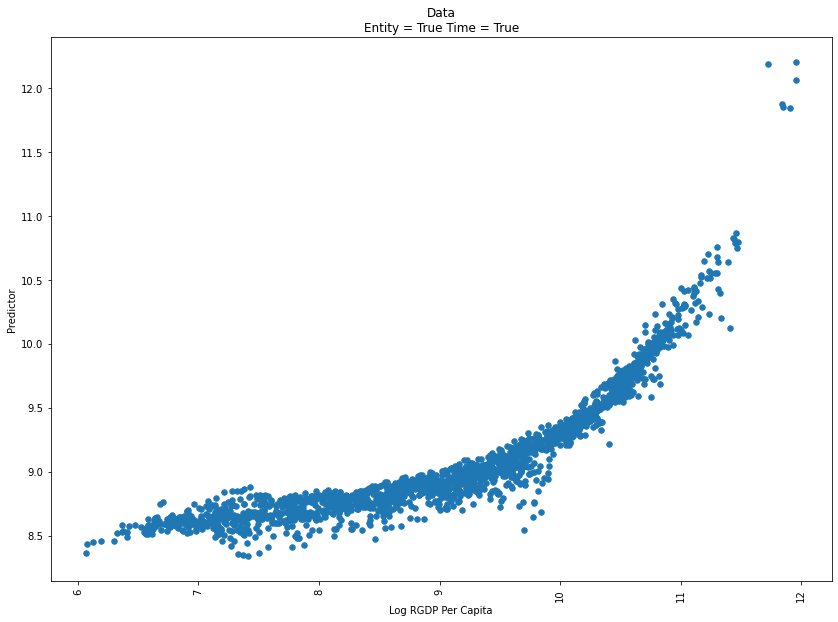

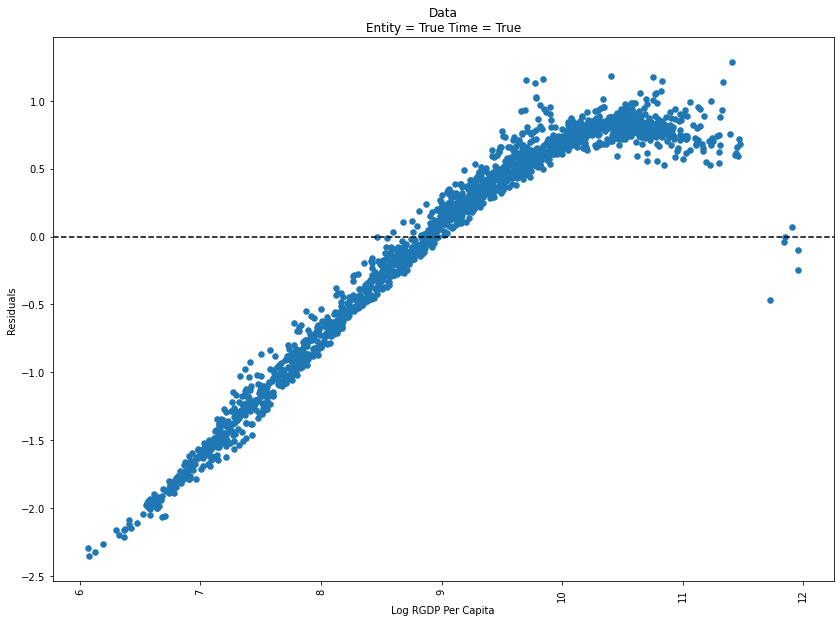

Data
Entity = True
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.4805
Estimator:                    PanelOLS   R-squared (Between):              0.7063
No. Observations:                 2031   R-squared (Within):               0.4805
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.7175
Time:                         22:24:19   Log-likelihood                    1068.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      289.18
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(6,1876)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-7-99750744eede>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-7-99750744eede>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-7-99750744eede>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

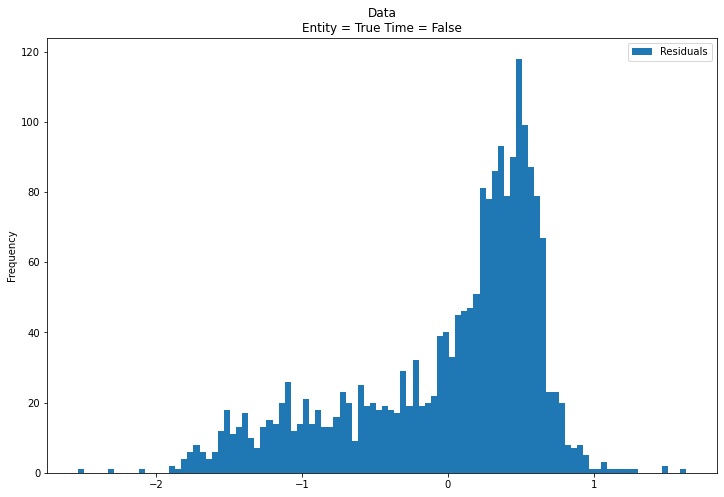

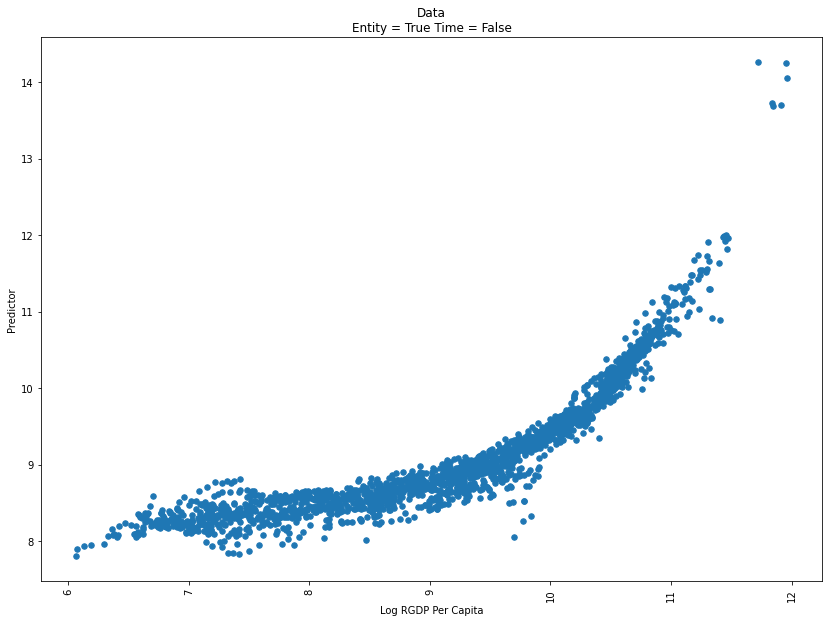

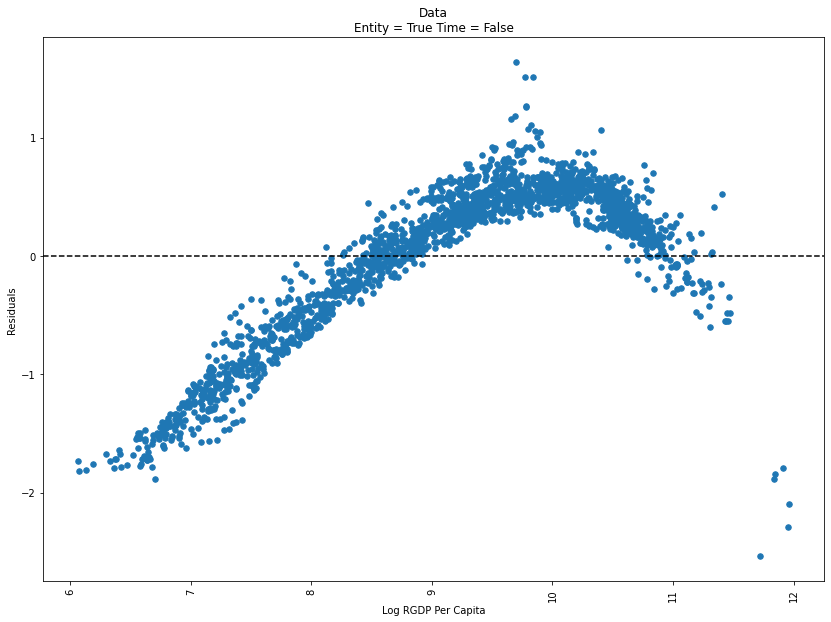

Data
Entity = False
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.7882
Estimator:                    PanelOLS   R-squared (Between):              0.7804
No. Observations:                 2031   R-squared (Within):               0.2220
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.7867
Time:                         22:24:21   Log-likelihood                   -1734.8
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      1246.6
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(6,2010)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-7-99750744eede>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-7-99750744eede>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-7-99750744eede>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

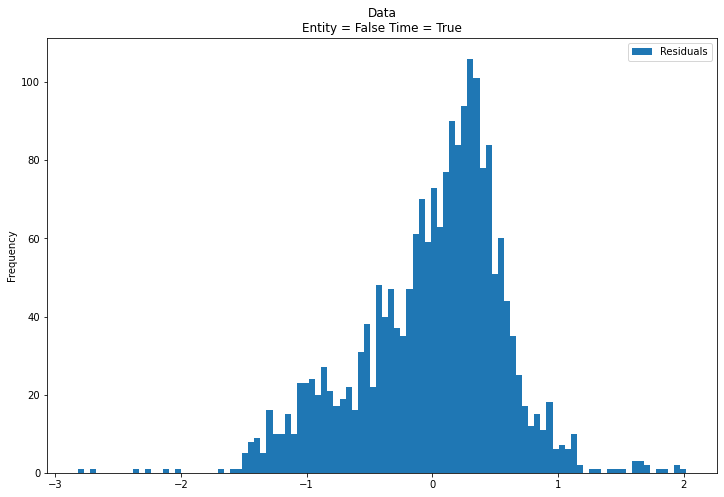

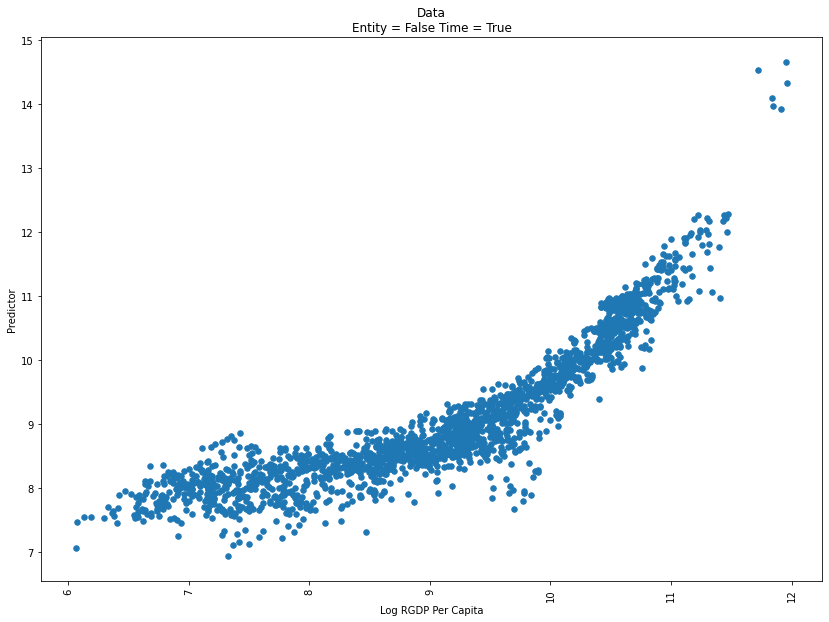

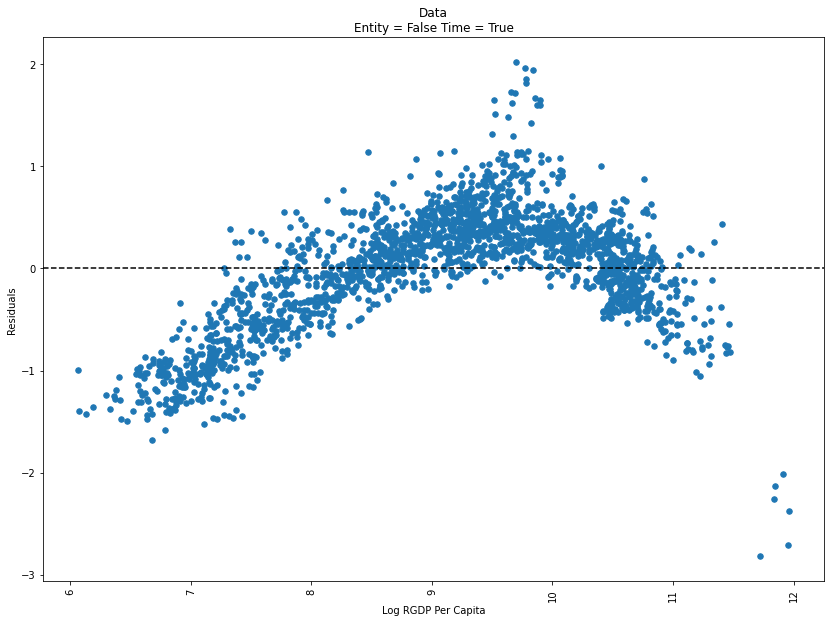

Data
Entity = False
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.7869
Estimator:                    PanelOLS   R-squared (Between):              0.7792
No. Observations:                 2031   R-squared (Within):               0.2565
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.7869
Time:                         22:24:23   Log-likelihood                   -1749.9
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      1245.6
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(6,2024)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust

<ipython-input-7-99750744eede>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-7-99750744eede>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-7-99750744eede>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

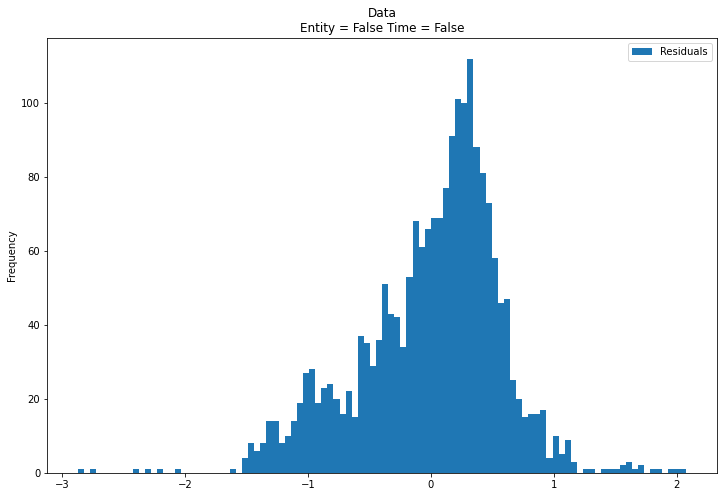

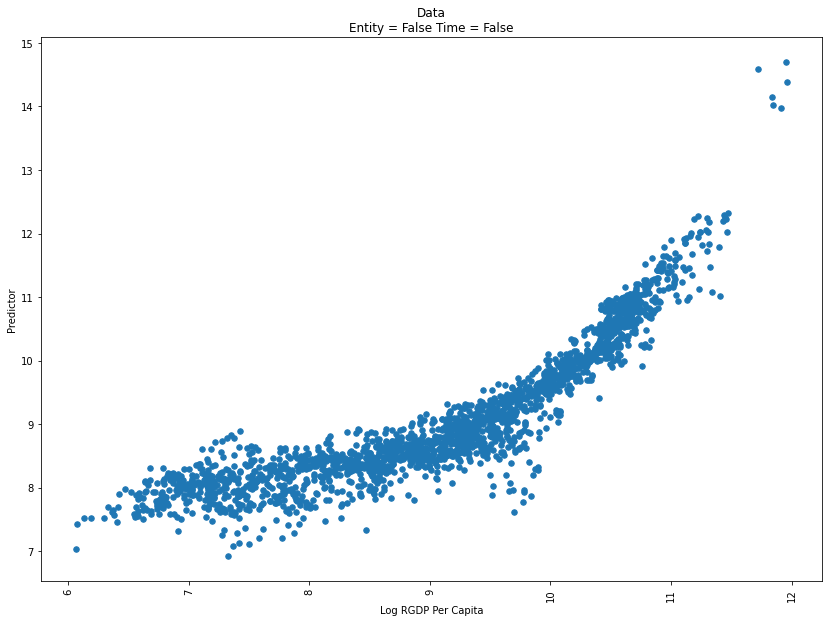

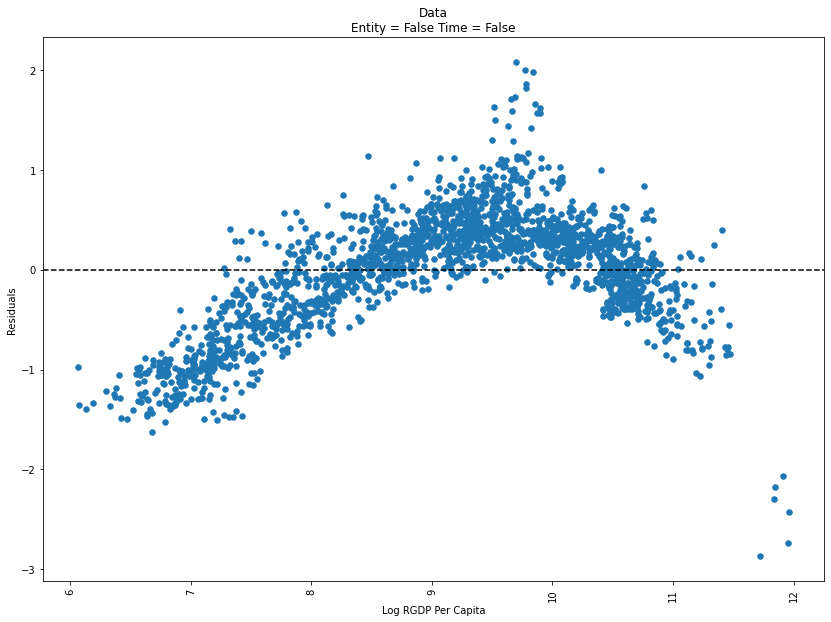

Diff Data
Entity = True
Time = True


<ipython-input-7-99750744eede>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0182
Estimator:                    PanelOLS   R-squared (Between):             -0.0009
No. Observations:                 1882   R-squared (Within):               0.0074
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0114
Time:                         22:24:25   Log-likelihood                    2753.1
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      5.3008
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(6,1714)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statistic (robust):             3.2917
      

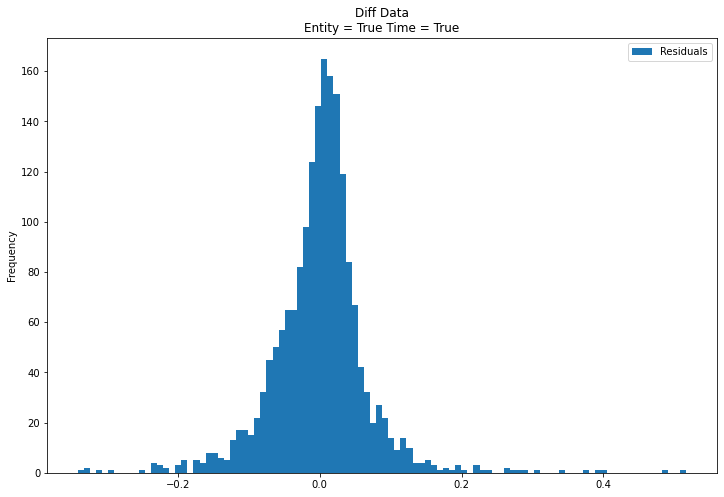

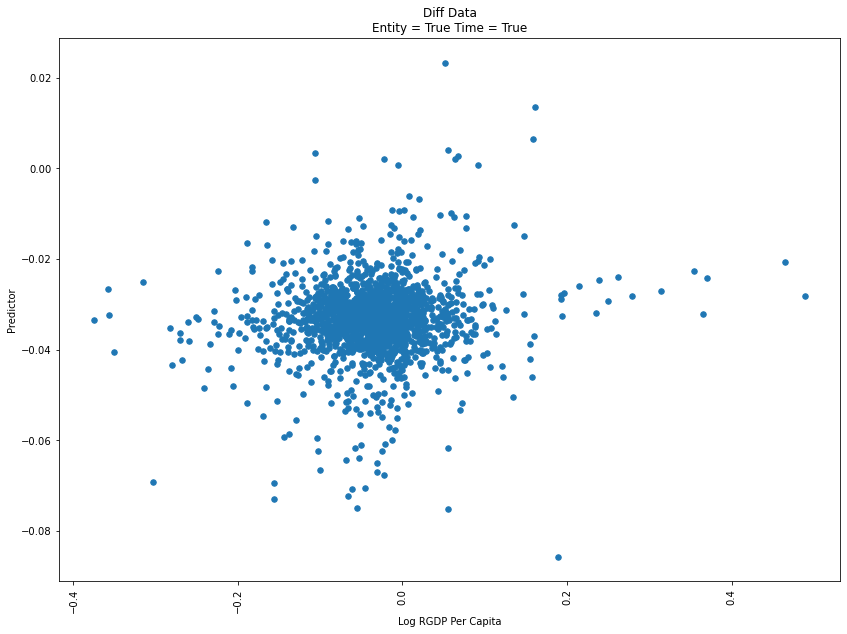

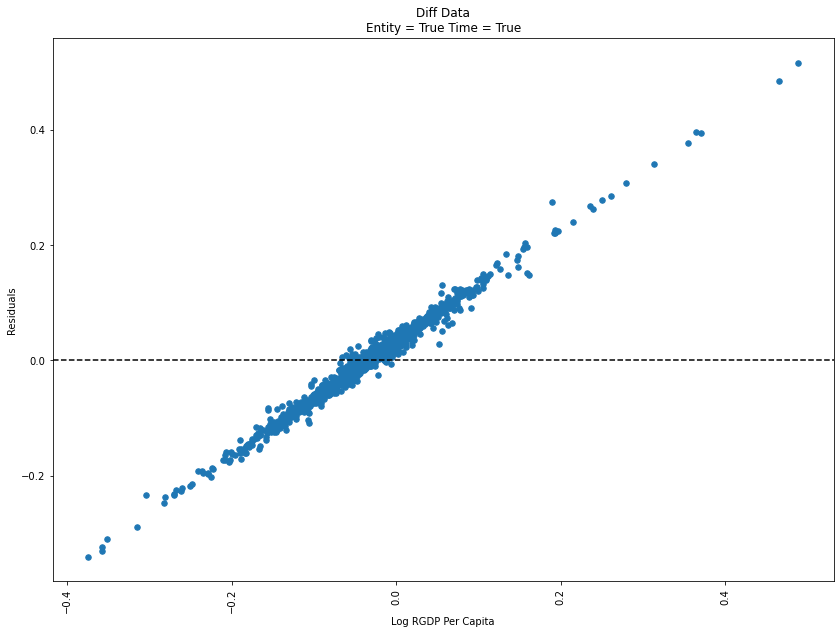

Diff Data
Entity = True
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0135
Estimator:                    PanelOLS   R-squared (Between):              0.0119
No. Observations:                 1882   R-squared (Within):               0.0135
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0174
Time:                         22:24:27   Log-likelihood                    2597.7
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      3.9512
Entities:                          162   P-value                           0.0006
Avg Obs:                        11.617   Distribution:                  F(6,1727)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

<ipython-input-7-99750744eede>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


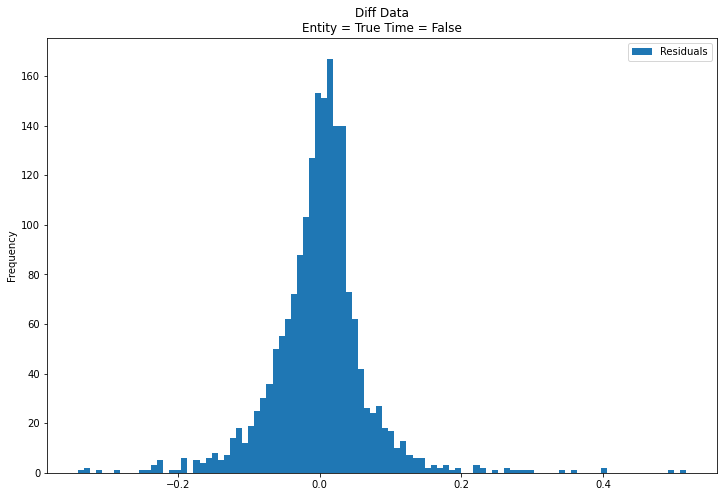

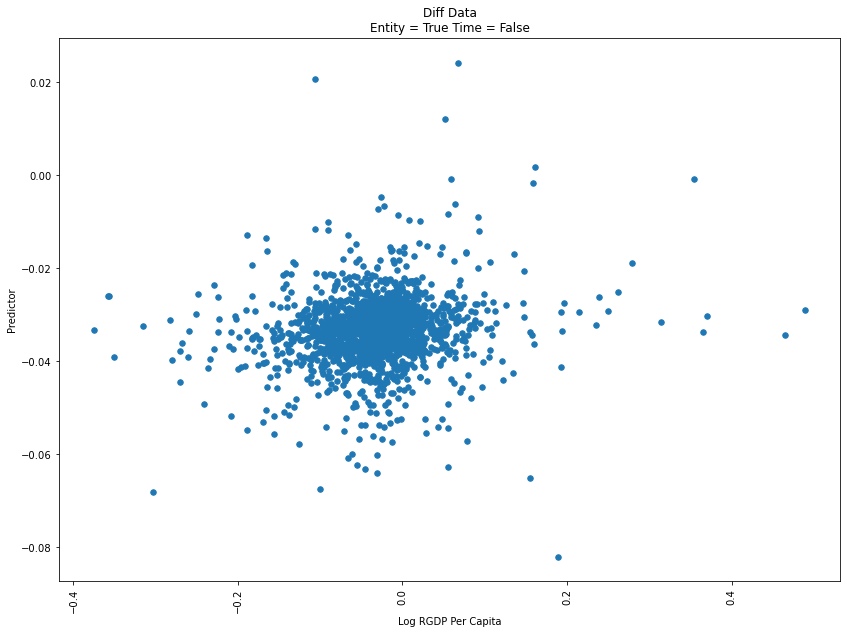

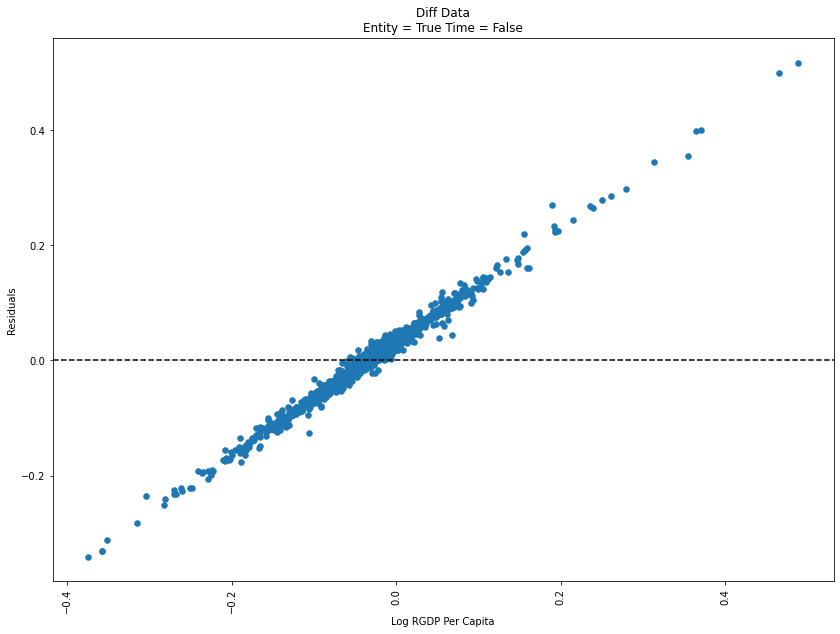

Diff Data
Entity = False
Time = True
Diff Data


<ipython-input-7-99750744eede>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0228
Estimator:                    PanelOLS   R-squared (Between):              0.0227
No. Observations:                 1882   R-squared (Within):               0.0069
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0147
Time:                         22:24:29   Log-likelihood                    2543.1
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      7.2445
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(6,1862)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statistic (robust):             4.7779
                

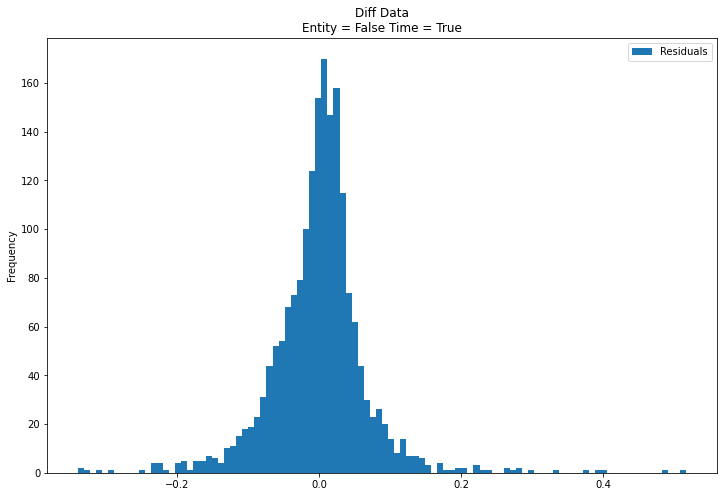

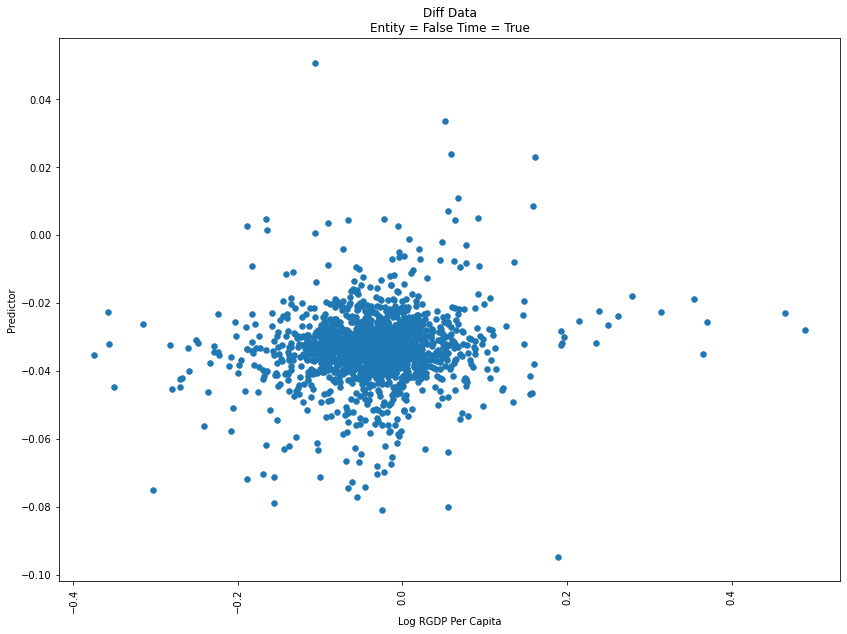

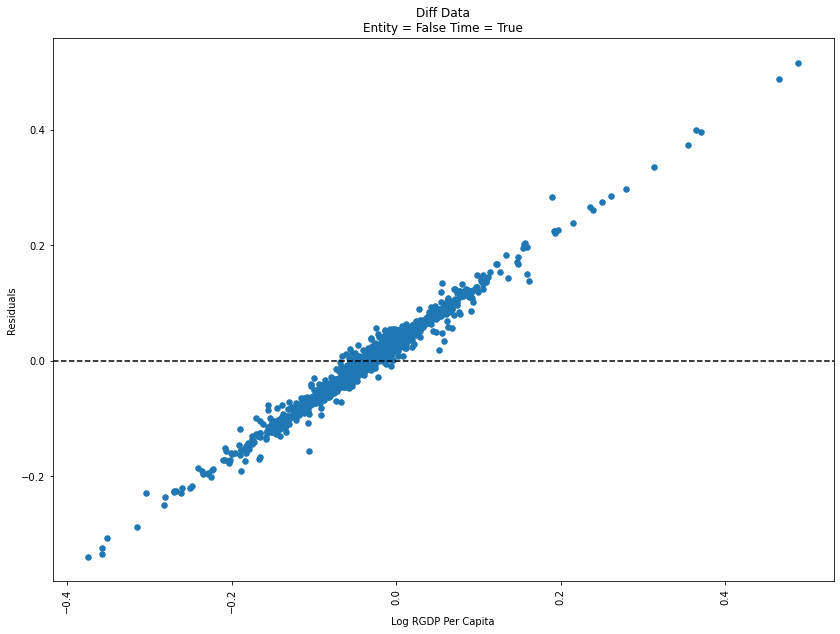

Diff Data
Entity = False
Time = False
Diff Data


<ipython-input-7-99750744eede>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0193
Estimator:                    PanelOLS   R-squared (Between):              0.0342
No. Observations:                 1882   R-squared (Within):               0.0115
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0193
Time:                         22:24:31   Log-likelihood                    2414.0
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      6.1362
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(6,1875)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statistic (robust):             4.5818
                

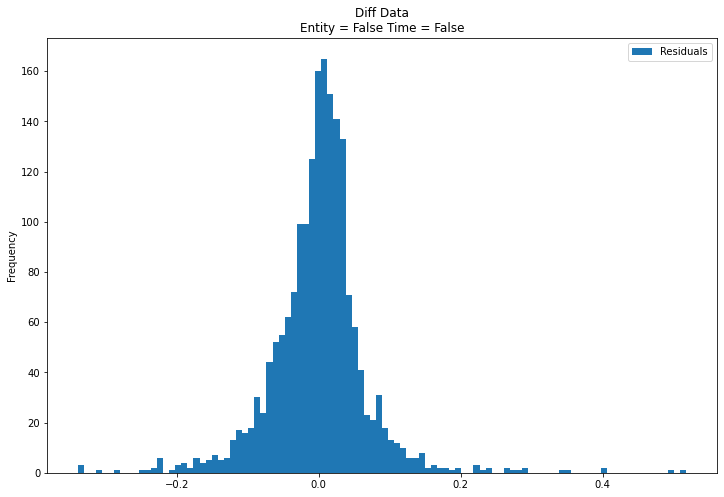

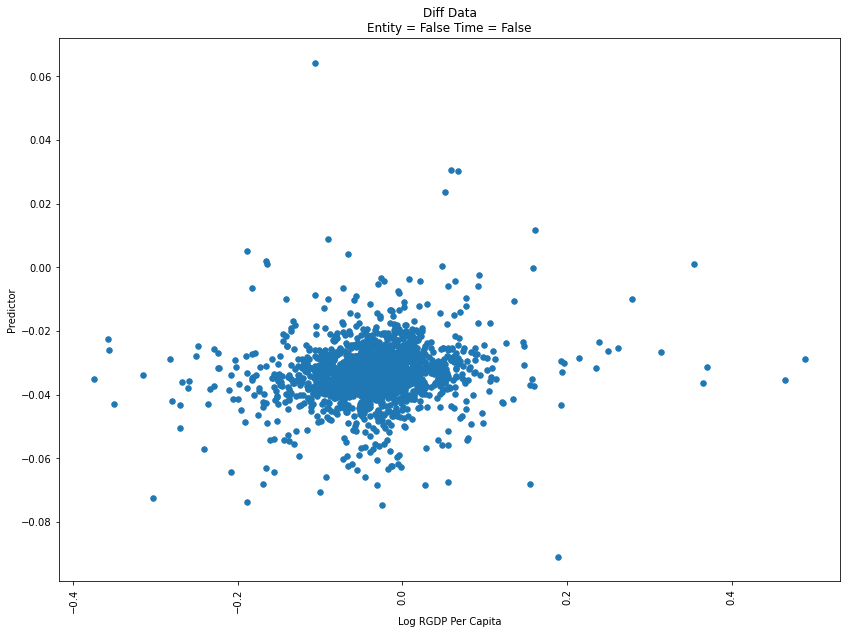

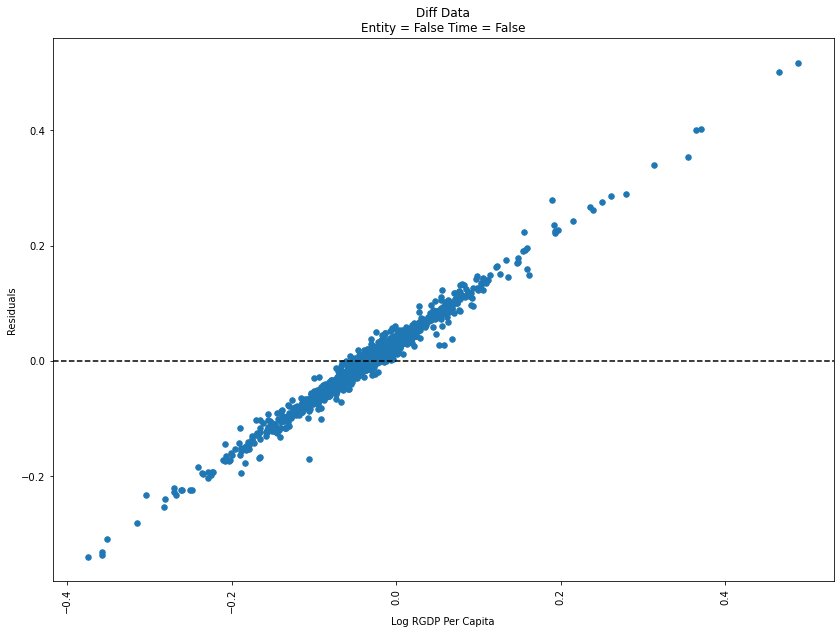

In [7]:
from linearmodels import PanelOLS

y_name = ["Log RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "RGDP Per Capita Lag"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            
            # Calls panel_regression method        
            model = PanelOLS(Y,X, entity_effects = entity, time_effects=time)
            results = model.fit(cov_type = 'clustered', cluster_entity=True)
            print(key, results, sep = "\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # Plots distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))
            
            # Plots observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                             s = 30, ax = ax)
            plt.xticks(rotation = 90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))
            plt.show()
            plt.close()

            # Plots observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                             s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation = 90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))
            plt.show()
            plt.close()